# Load all I need to process our original Images.

In [1]:
import cv2
import os
import random
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define the paths to the images and labels.

In [2]:
# ../input/
PATH = os.path.abspath(os.path.join('..', 'Medical_Xray_CNN'))

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "img", "select")

# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

# Load labels
labels = pd.read_csv('Data_Entry_2017.csv')

In [3]:
images[0:5]

['/home/felipe/Medical_Xray_CNN/img/select/00010505_009.png',
 '/home/felipe/Medical_Xray_CNN/img/select/00027993_000.png',
 '/home/felipe/Medical_Xray_CNN/img/select/00000377_001.png',
 '/home/felipe/Medical_Xray_CNN/img/select/00030339_001.png',
 '/home/felipe/Medical_Xray_CNN/img/select/00016371_007.png']

# Check some random images.

/home/felipe/Medical_Xray_CNN/img/select/00023179_005.png
/home/felipe/Medical_Xray_CNN/img/select/00011174_003.png
/home/felipe/Medical_Xray_CNN/img/select/00012087_042.png


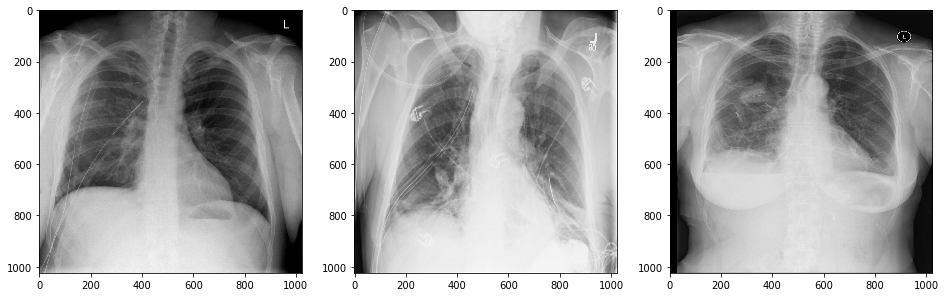

In [3]:
r = random.sample(images, 3)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))
print(r[0])
print(r[1])
print(r[2])

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]))
plt.show()

# Check the labels.

In [4]:
labels.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN


# We will construct a function to check if the image contain a pre-selected disease, resize the image, convert to numpy array and append a value of 1, if disease is found, or 0, if not, to my new label array.

In [5]:
def proc_images():
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    
    disease = 'Effusion' #['Infiltration' ,'Effusion' ,'Pneumothorax']

    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 128
    HEIGHT = 128

    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        
        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

        # Labels
        if disease in finding:
            finding = str(disease)
            #finding = 1
            y.append(finding)

        else:
            finding = "Not_" + str(disease)
            #finding = 0
            y.append(finding)            
            
    return x,y            



In [6]:
x,y = proc_images()

# Check the dimensions of the images.

In [8]:
print(len(df), df.images[0].shape)

(8400, (128, 128, 3))


# Save our arrays.

In [10]:
np.savez("x_{}_arrays_{}".format(disease,x.shape[1]), x)
np.savez("y_{}_labels_{}".format(disease,x.shape[1]), y)

In [9]:
df.to_csv('Effusion_arrays_select.csv',index=False, mode='w', sep=' ')

In [ ]:
 #################################################################

In [ ]:
#things I might use in a future.
        '''
        if disease[0] in finding:
            #finding = str(disease)
            finding = 1
            y.append(finding)
        elif disease[1] in finding:
            finding = 2
            y.append(finding)
        elif disease[2] in finding:
            finding = 3
            y.append(finding)
        else:
            finding = 0
            y.append(finding)
            
        '''
